## Olufemi_2.5_Visual-Weather-Systems-CNN

## Table of Contents  
* [1. Import data libraries](#1-import-data-libraries)  
* [2. Input additional requirements](#2-input-additional-requirements)  
* [3.  Load data and image](#3-load-data-and-image)  
* [4. Create CNN model](#4-create-cnn-model)  
* [5. Plot accuracy and loss](#5-plot-accuracy-and-loss)  
* [6. Display confusion matrix](#6-display-confusion-matrix)  
* [7. Generate images and predictions](#7-generate-images-and-predictions)

## 1. Import data libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

## 2. Input Additional Requirements

In [6]:
#show all plots
%matplotlib inline

#turning off warning feature
warnings.filterwarnings('ignore')

## 3. Load data and images

In [12]:
# Download the weather images and put them in a directory
path = r'C:\Users\Olufemi\Downloads\CareerFoundry Data Analyics\Machine Learning Specialization Course\Achievement 2\Data Sets\Unsupervised\Original datasets\Multi-class Weather Dataset\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [14]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


## 4. Create the CNN model

In [18]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [20]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 60, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size-1,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size-1,
)

Epoch 1/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5460 - loss: 0.1325 - val_accuracy: 0.7083 - val_loss: 0.1032
Epoch 2/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.7188 - loss: 0.0840 - val_accuracy: 0.7760 - val_loss: 0.0906
Epoch 3/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 686ms/step - accuracy: 0.7085 - loss: 0.0998 - val_accuracy: 0.7344 - val_loss: 0.0984
Epoch 4/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8125 - loss: 0.0768 - val_accuracy: 0.6406 - val_loss: 0.1234
Epoch 5/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 729ms/step - accuracy: 0.7646 - loss: 0.0847 - val_accuracy: 0.6510 - val_loss: 0.1312
Epoch 6/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7188 - loss: 0.0961 - val_accuracy: 0.5521 - val_loss: 0.1757
Epoch 7/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 681ms/step - accuracy: 0.7025 - loss: 0.1034 - val_accuracy: 0.6458 - val_loss: 0.1139
Epoch 8/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.7031 - loss: 0.0964 - val_accuracy: 0

In [24]:
results = pd.DataFrame(model.history.history)

## 5. Plot Accuracy and Loss

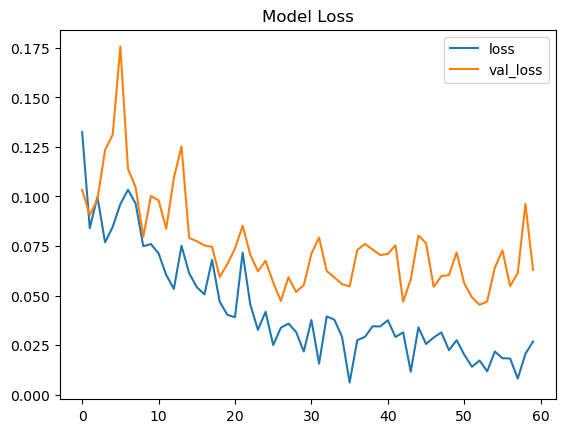

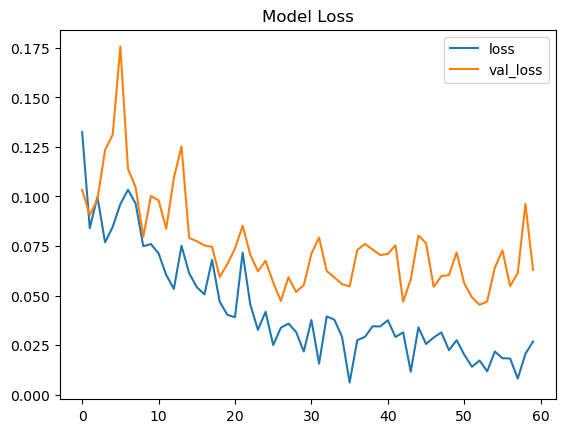

In [34]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')
plt.show()

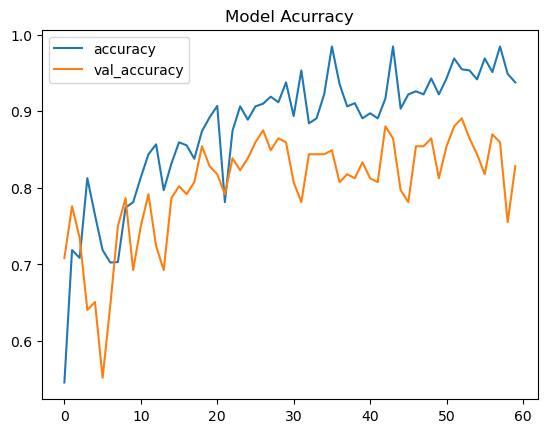

In [36]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')
plt.show()

In [38]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9375, Val_Accuracy: 0.828125
Loss: 0.02678772062063217, Val_Loss: 0.06288202852010727


## 6. Display Confusion Matrix

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step


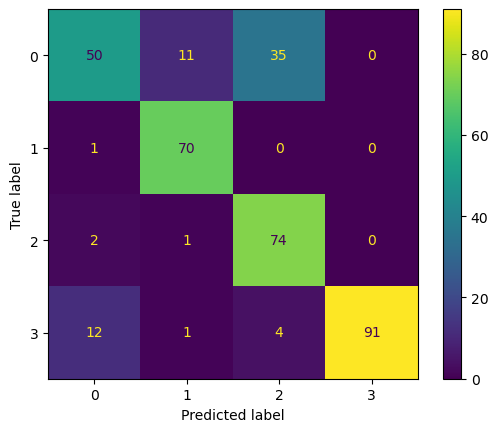

In [42]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## 7. Generate images and their predictions

In [49]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


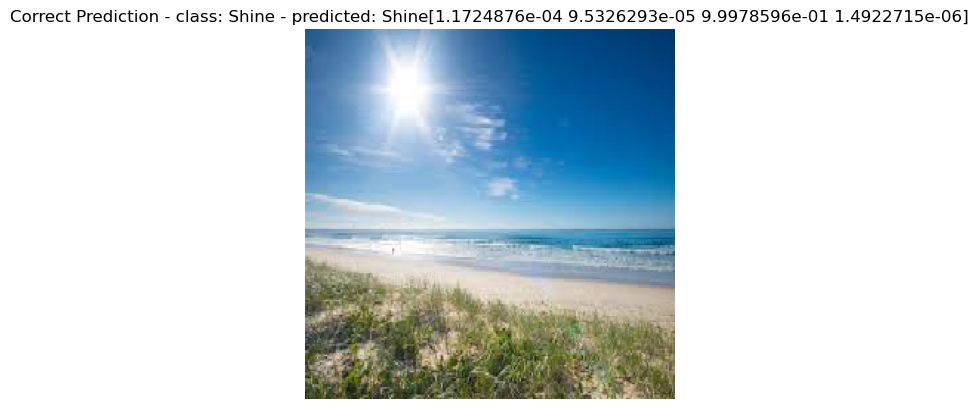

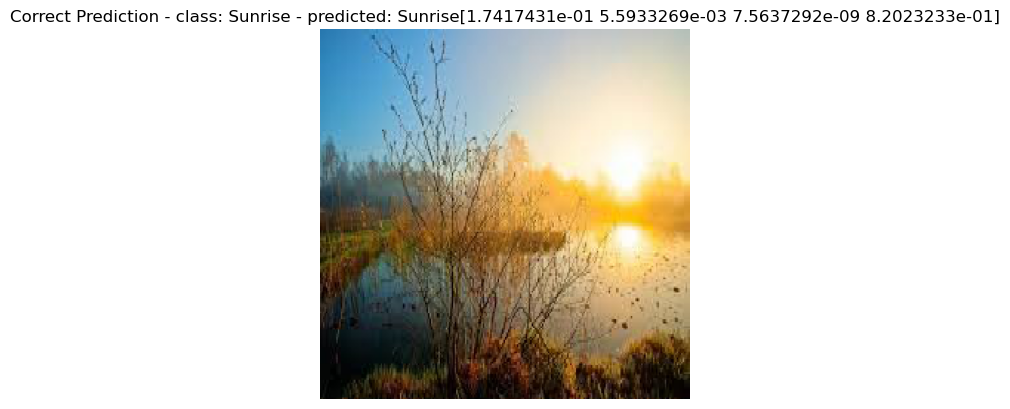

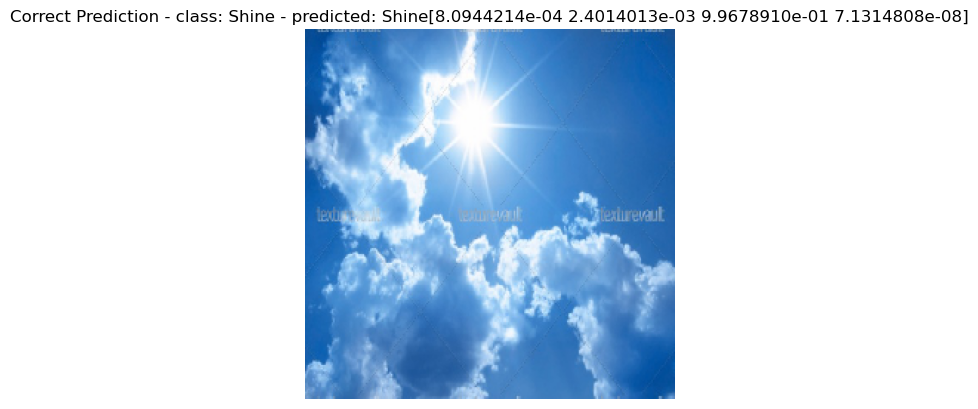

In [53]:
predict_one(model, 3) #<--you can show multiple pictures with this command. Just fill in the number you want to see.
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


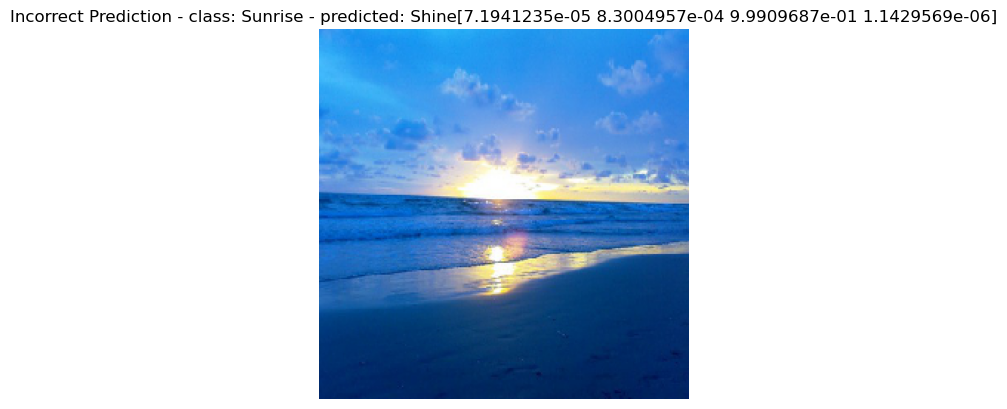

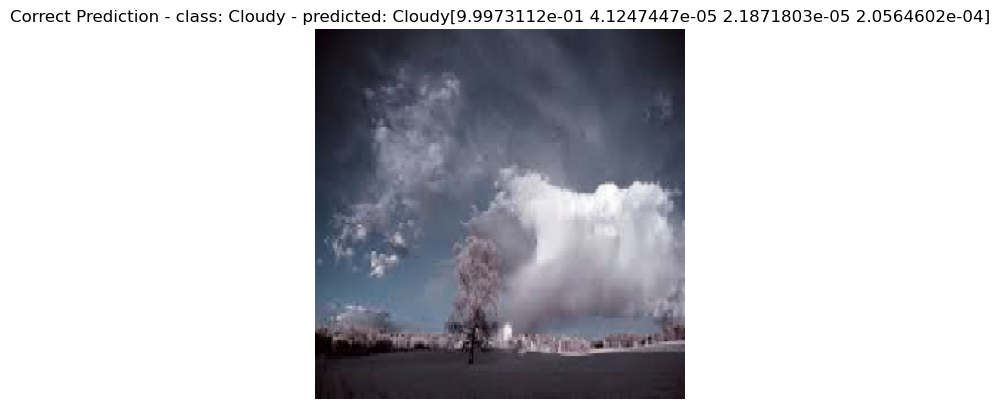

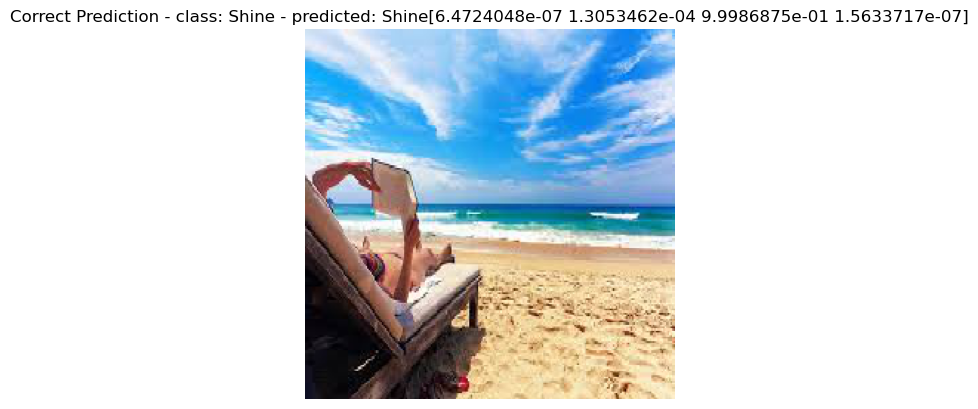

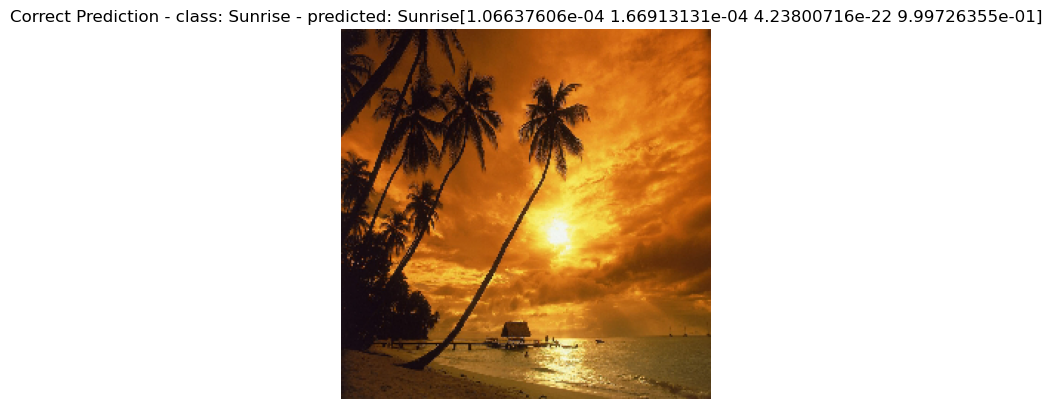

In [55]:
predict_one(model, 4) #<--you can show multiple pictures with this command. Just fill in the number you want to see.
plt.show()